In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits

In [2]:

# Load FITS data
data = fits.open("HIP 41378_med-58087-HIP4211201_sp10-185.fits")

In [3]:
#checking the data structure
data.info()

Filename: HIP 41378_med-58087-HIP4211201_sp10-185.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Information    1 PrimaryHDU      91   ()      
  1  COADD_B       1 BinTableHDU     37   1R x 6C   [4122E, 4122E, 4122E, 4122I, 4122I, 4122D]   
  2  COADD_R       1 BinTableHDU     37   1R x 6C   [3750E, 3750E, 3750E, 3750I, 3750I, 3750D]   
  3  B-83645602    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  4  B-83645615    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  5  B-83645628    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  6  R-83645602    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  7  R-83645615    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  8  R-83645628    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   


In [4]:
#based on the data structure, the spectra are in the No.1 and No.2
#No1. COADD_B: Blue arm spectra
#No2. COADD_R: Red arm spectra

In [5]:
#showing data header, just because v:
data[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11b          
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                98928 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    6 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'COADD_B '           / The extension name                             
NORM    =                   

In [6]:
#based on the data header, COADD_B and COADD_R consist of FLUX, IVAR?, WAVELENTH, ANDMASK?, ORMASK?, (FLUX) NORMALIZATION data

In [7]:
#assigning the data into variables, flux and wavelength

#Red arm spectra
wvr = data[2].data["WAVELENGTH"]
flr = data[2].data["FLUX"]

#Blue arm spectra
wvb = data[1].data["WAVELENGTH"]
flb = data[1].data["FLUX"]

In [8]:
#to find wavelenghth range in any data array
#wvr_1=data[1].data["WAVELENGTH"]
#print(np.min(wvr_1),np.max(wvr_1))

In [9]:
#checking the wavelength range, just because v:
print(np.min(wvr),np.max(wvr)) #for red arm
print(np.min(wvb),np.max(wvb)) #blue arm

6298.685 6866.569
4904.6714 5392.869


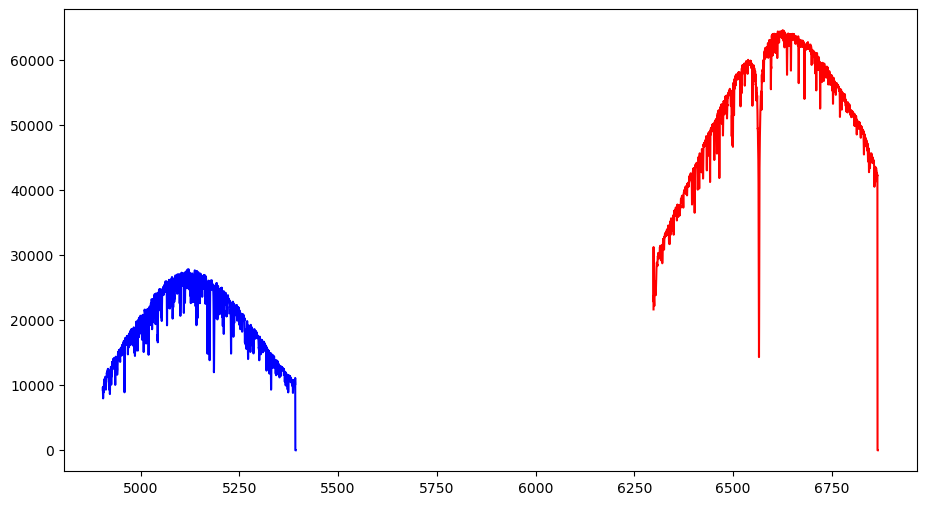

In [10]:
#quick plot
plt.figure(figsize=(11,6))
plt.plot(wvr[0,:],flr[0,:],color="red")
plt.plot(wvb[0,:],flb[0,:],color="blue")
plt.show()

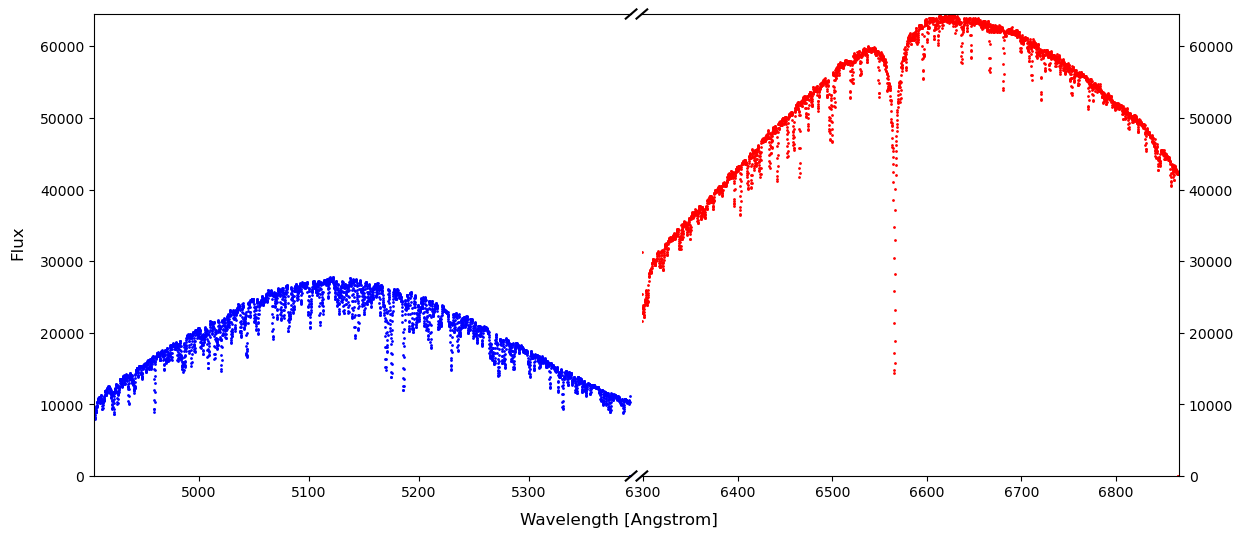

In [11]:
#plotting broken axis example, where the x-axis will have a portion cut out.

import matplotlib.pylab as plt
import numpy as np

#wavelength
x1 = wvb
x2 = wvr

#flux
y1 = flb
y2 = flr

# Find the range of normalized flux values
min_flux = min(np.min(flb), np.min(flr))
max_flux = max(np.max(flb), np.max(flr))

# Increase the figure width for stretching
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(14, 6))
f.subplots_adjust(wspace=0.020)


# plot the same data on both axes
ax.scatter(x1, y1,s=1, color="blue")
ax2.scatter(x2, y2,s=1, color="red")

# Set x-axis limits
ax.set_xlim(np.min(wvb), np.max(wvb))
ax2.set_xlim(np.min(wvr), np.max(wvr))

# Set y-axis limits based on the range of normalized flux values
ax.set_ylim(min_flux, max_flux)
ax2.set_ylim(min_flux, max_flux)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

d = 0.01  # how big to make the diagonal lines in axes coordinates

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

f.text(0.5, 0.03, 'Wavelength [Angstrom]',ha='center',size=12)
f.text(0.065, 0.5, 'Flux', va='center', rotation='vertical',size=12)

plt.show()

In [12]:
# Calculate median flux for each arm
median_flux_red = np.median(flr)
median_flux_blue = np.median(flb)

In [13]:
# Normalize spectra
normalized_red = flr / median_flux_red
normalized_blue = flb / median_flux_blue


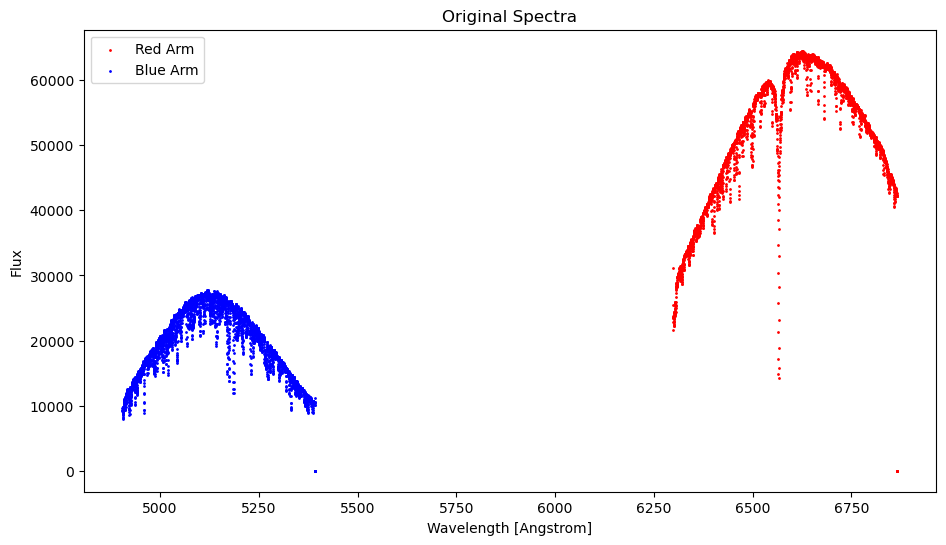

In [14]:
# Plot original spectra
plt.figure(figsize=(11, 6))
plt.scatter(wvr, flr, s=1, label='Red Arm', color='red')
plt.scatter(wvb, flb, s=1, label='Blue Arm', color='blue')
plt.title('Original Spectra')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux')
plt.legend()
plt.show()

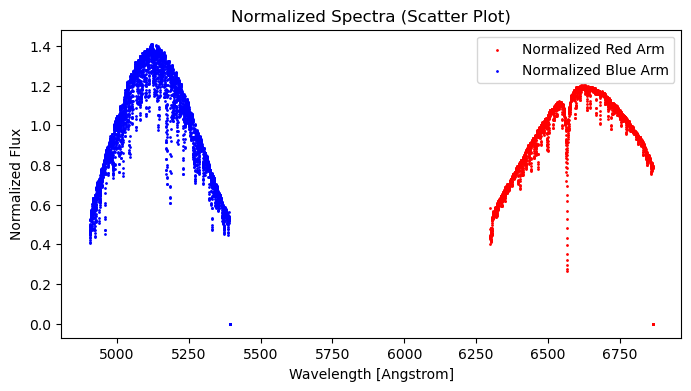

In [15]:
plt.figure(figsize=(8, 4))
plt.scatter(wvr, normalized_red, label='Normalized Red Arm', color='red', s=1)
plt.scatter(wvb, normalized_blue, label='Normalized Blue Arm', color='blue', s=1)
plt.title('Normalized Spectra (Scatter Plot)')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

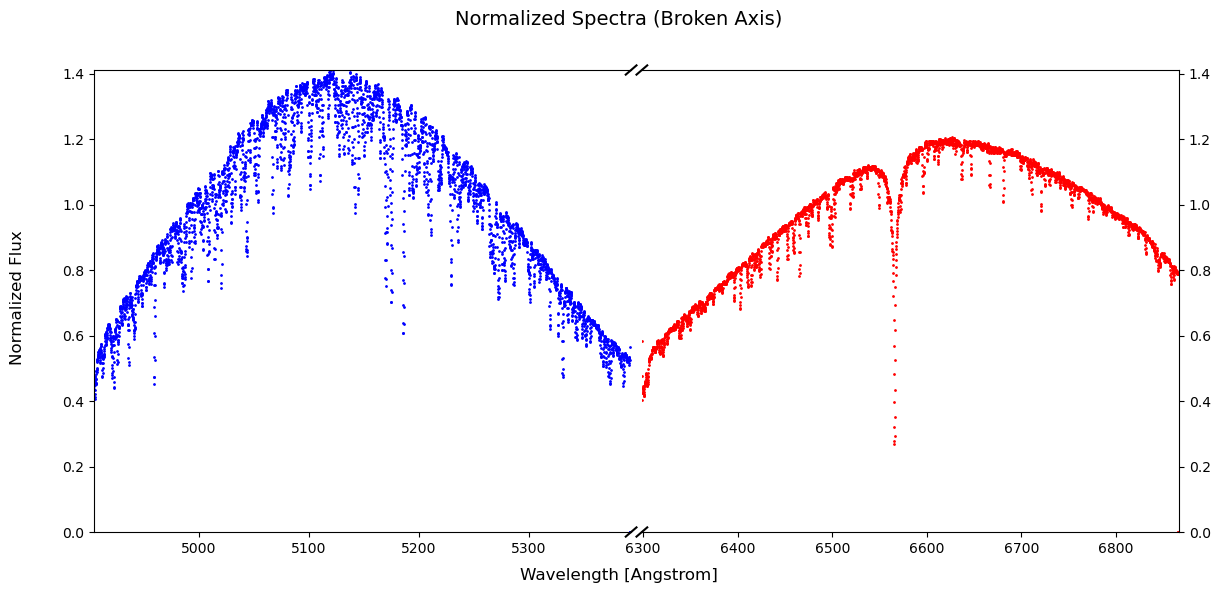

In [16]:
#plotting broken axis example, where the x-axis will have a portion cut out.

import matplotlib.pylab as plt
import numpy as np

#wavelength
x1 = wvb
x2 = wvr

#flux
y1 = normalized_blue
y2 = normalized_red

# Find the range of normalized flux values
min_flux = min(np.min(normalized_blue), np.min(normalized_red))
max_flux = max(np.max(normalized_blue), np.max(normalized_red))

# Increase the figure width for stretching
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(14, 6))
f.subplots_adjust(wspace=0.020)

# plot the same data on both axes
ax.scatter(x1, y1,s=1, color="blue")
ax2.scatter(x2, y2,s=1, color="red")

ax.set_xlim(np.min(x1), np.max(x1))
ax2.set_xlim(np.min(x2), np.max(x2))

# Set y-axis limits based on the range of normalized flux values
ax.set_ylim(min_flux, max_flux)
ax2.set_ylim(min_flux, max_flux)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

d = 0.01  # how big to make the diagonal lines in axes coordinates

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

f.text(0.5, 0.03, 'Wavelength [Angstrom]',ha='center',size=12)
f.text(0.065, 0.5, 'Normalized Flux', va='center', rotation='vertical',size=12)
f.suptitle('Normalized Spectra (Broken Axis)', size=14)

plt.show()

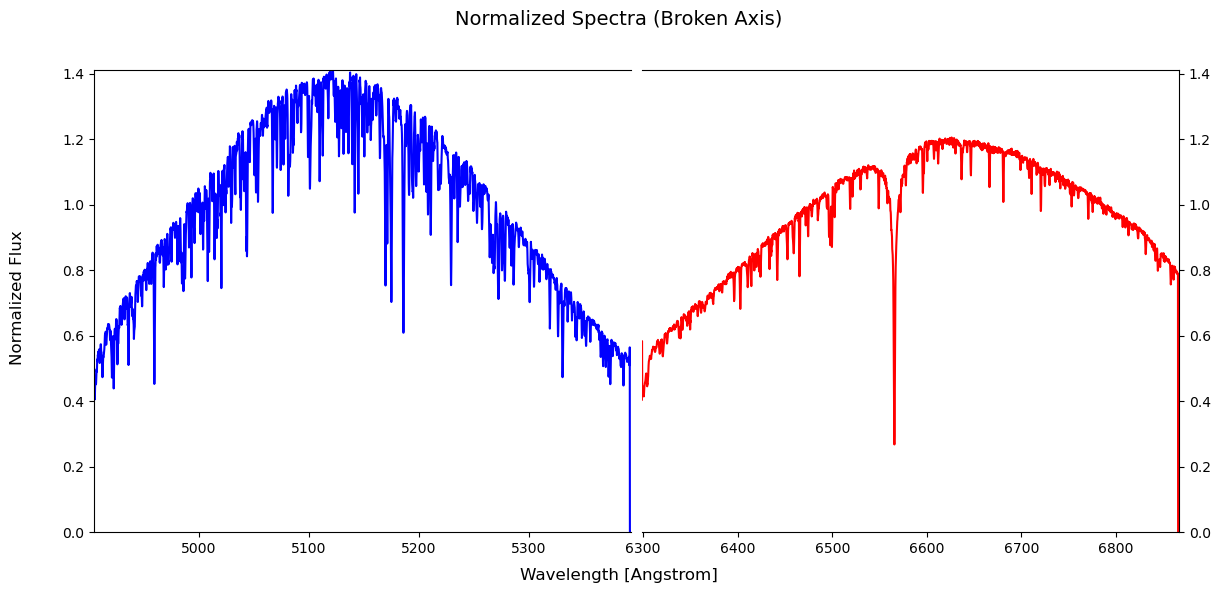

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have defined normalized_red, normalized_blue, wvr, wvb, d, and other variables as in your code...

# Find the range of normalized flux values
min_flux = min(np.min(normalized_blue), np.min(normalized_red))
max_flux = max(np.max(normalized_blue), np.max(normalized_red))

# Increase the figure width for stretching
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(14, 6))
f.subplots_adjust(wspace=0.020)

# Plot the normalized spectra on both axes with a gap in the broken axis
ax.plot(wvb[0,:], normalized_blue[0,:], label='Normalized Blue Arm', color='blue')
ax2.plot(wvr[0,:], normalized_red[0,:], label='Normalized Red Arm', color='red')

# Add a gap in the broken axis using np.nan
ax.plot([np.nan, np.nan], [np.nan, np.nan], color='k', linestyle='-', linewidth=1)
ax2.plot([np.nan, np.nan], [np.nan, np.nan], color='k', linestyle='-', linewidth=1)

# Set x-axis limits
ax.set_xlim(np.min(wvb), np.max(wvb))
ax2.set_xlim(np.min(wvr), np.max(wvr))

# Set y-axis limits based on the range of normalized flux values
ax.set_ylim(min_flux, max_flux)
ax2.set_ylim(min_flux, max_flux)

# Hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

# Adjust the figure layout
f.text(0.5, 0.03, 'Wavelength [Angstrom]', ha='center', size=12)
f.text(0.065, 0.5, 'Normalized Flux', va='center', rotation='vertical', size=12)
f.suptitle('Normalized Spectra (Broken Axis)', size=14)

plt.show()


<IPython.core.display.Javascript object>


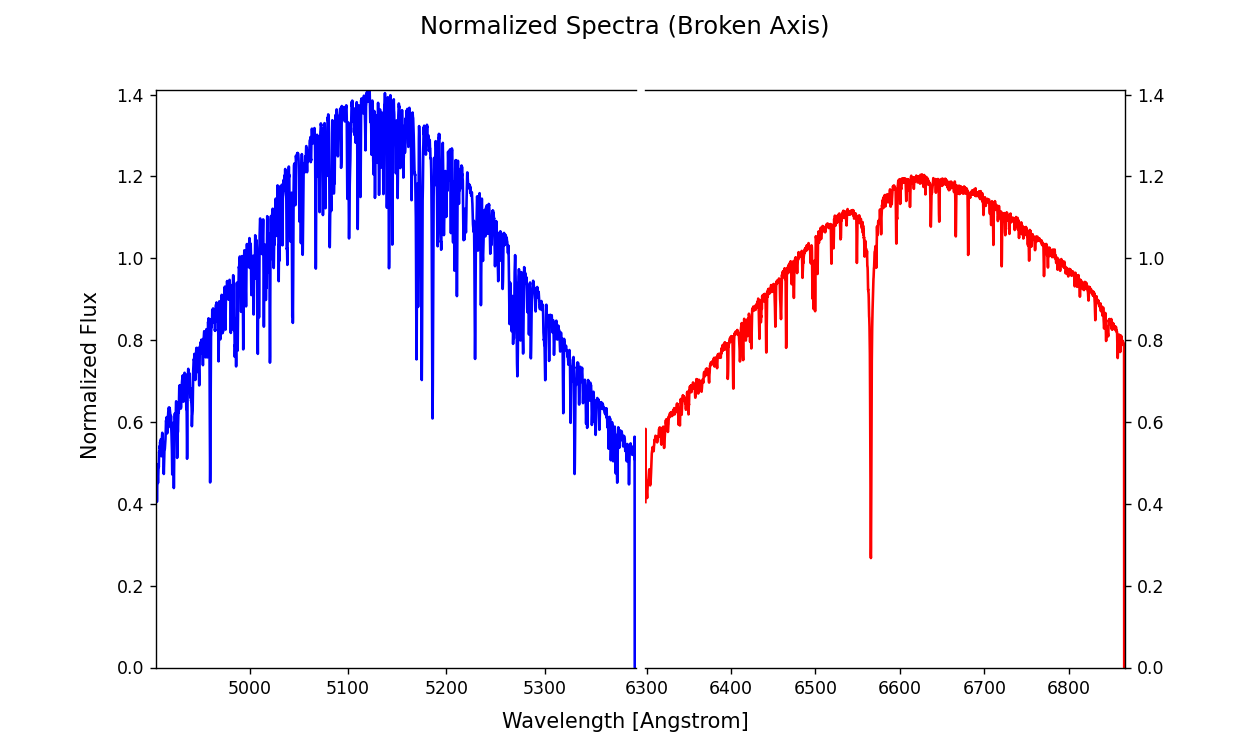

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have defined normalized_red, normalized_blue, wvr, wvb, and other variables as in your code...

# Find the range of normalized flux values
min_flux = min(np.min(normalized_blue), np.min(normalized_red))
max_flux = max(np.max(normalized_blue), np.max(normalized_red))

# Increase the figure width for stretching
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(10, 6))
f.subplots_adjust(wspace=0.020)

# Plot the normalized spectra on both axes with a gap in the broken axis
ax.plot(wvb[0,:], normalized_blue[0,:], label='Normalized Blue Arm', color='blue')
ax2.plot(wvr[0,:], normalized_red[0,:], label='Normalized Red Arm', color='red')

# Add a gap in the broken axis using np.nan
ax.plot([np.nan, np.nan], [np.nan, np.nan], color='k', linestyle='-', linewidth=1)
ax2.plot([np.nan, np.nan], [np.nan, np.nan], color='k', linestyle='-', linewidth=1)

# Set x-axis limits
ax.set_xlim(np.min(wvb), np.max(wvb))
ax2.set_xlim(np.min(wvr), np.max(wvr))

# Set y-axis limits based on the range of normalized flux values
ax.set_ylim(min_flux, max_flux)
ax2.set_ylim(min_flux, max_flux)

# Hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

# Adjust the figure layout
f.text(0.5, 0.03, 'Wavelength [Angstrom]', ha='center', size=12)
f.text(0.065, 0.5, 'Normalized Flux', va='center', rotation='vertical', size=12)
f.suptitle('Normalized Spectra (Broken Axis)', size=14)

plt.show()


<IPython.core.display.Javascript object>


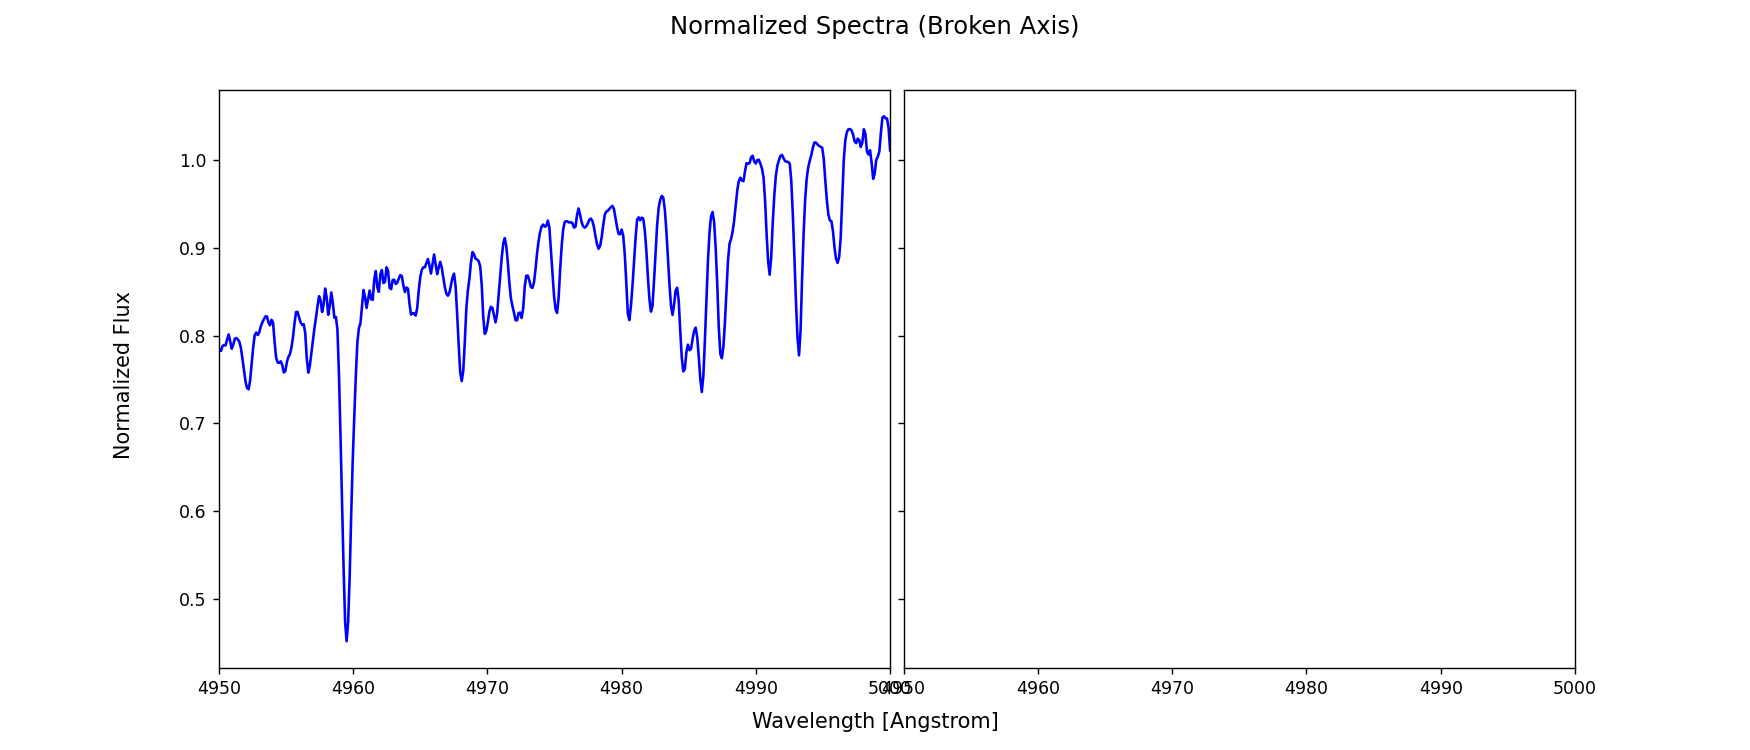

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrum(wavelength_range):
    # Assuming you have defined normalized_red, normalized_blue, wvr, wvb, and other variables as in your code...

    # Select the data within the wavelength range
    mask_blue = (wvb[0,:] >= wavelength_range[0]) & (wvb[0,:] <= wavelength_range[1])
    mask_red = (wvr[0,:] >= wavelength_range[0]) & (wvr[0,:] <= wavelength_range[1])

    # Increase the figure width for stretching
    f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(14, 6))
    f.subplots_adjust(wspace=0.020)

    # Plot the normalized spectra on both axes with a gap in the broken axis
    ax.plot(wvb[0,mask_blue], normalized_blue[0,mask_blue], label='Normalized Blue Arm', color='blue')
    ax2.plot(wvr[0,mask_red], normalized_red[0,mask_red], label='Normalized Red Arm', color='red')

    # Set x-axis limits
    ax.set_xlim(wavelength_range[0], wavelength_range[1])
    ax2.set_xlim(wavelength_range[0], wavelength_range[1])

    # Adjust the figure layout
    f.text(0.5, 0.03, 'Wavelength [Angstrom]', ha='center', size=12)
    f.text(0.065, 0.5, 'Normalized Flux', va='center', rotation='vertical', size=12)
    f.suptitle('Normalized Spectra (Broken Axis)', size=14)

    plt.show()

# Call the function with the desired wavelength range
plot_spectrum([4950, 5000])


<IPython.core.display.Javascript object>


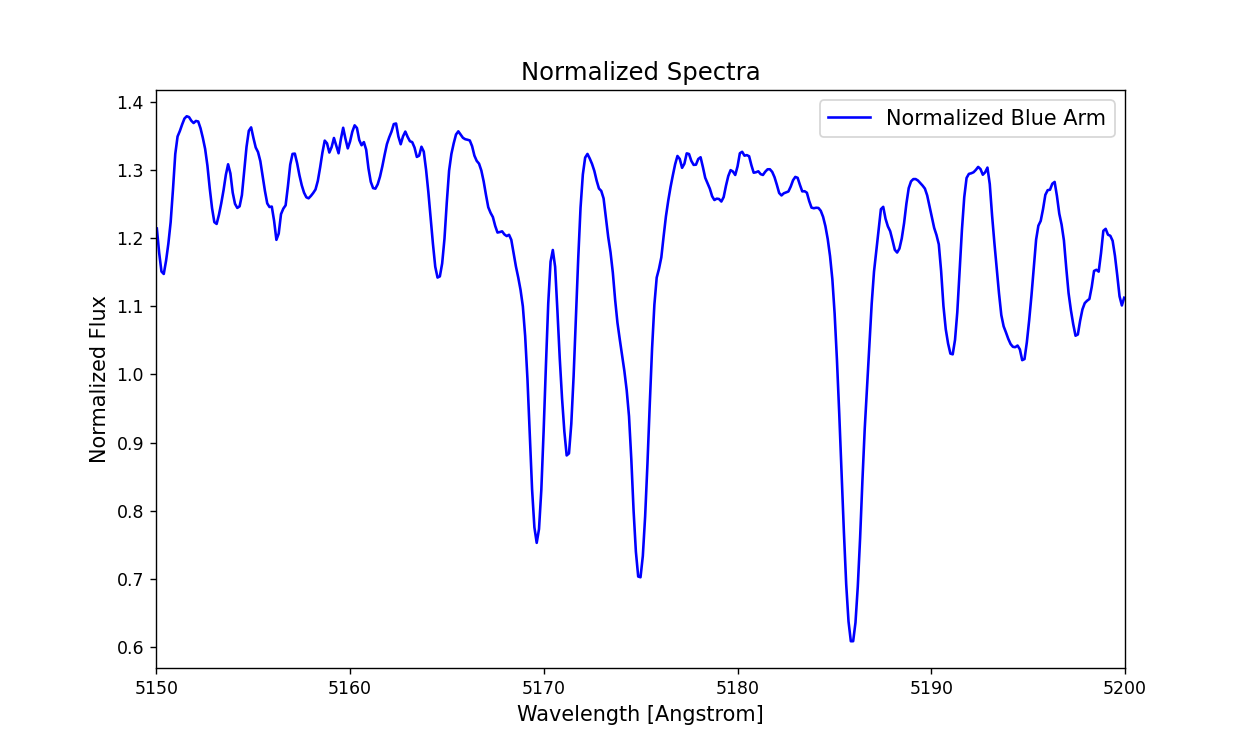

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrum(wavelength_range):
    # Assuming you have defined normalized_red, normalized_blue, wvr, wvb, and other variables as in your code...

    # Select the data within the wavelength range
    mask_blue = (wvb[0,:] >= wavelength_range[0]) & (wvb[0,:] <= wavelength_range[1])
    mask_red = (wvr[0,:] >= wavelength_range[0]) & (wvr[0,:] <= wavelength_range[1])

    # Check if there is any data in the wavelength range for each spectrum
    if not np.any(mask_blue) and not np.any(mask_red):
        print("No data in the specified wavelength range.")
        return

    # Create a new figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the spectra that fall within the wavelength range
    if np.any(mask_blue):
        ax.plot(wvb[0,mask_blue], normalized_blue[0,mask_blue], label='Normalized Blue Arm', color='blue')
    if np.any(mask_red):
        ax.plot(wvr[0,mask_red], normalized_red[0,mask_red], label='Normalized Red Arm', color='red')

    # Set x-axis limits
    ax.set_xlim(wavelength_range[0], wavelength_range[1])

    # Adjust the figure layout
    ax.set_xlabel('Wavelength [Angstrom]', fontsize=12)
    ax.set_ylabel('Normalized Flux', fontsize=12)
    ax.legend(fontsize=12)
    ax.set_title('Normalized Spectra', fontsize=14)

    plt.show()

# Call the function with the desired wavelength range
plot_spectrum([5150, 5200])


In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt

def correct_wavelength_with_calibration(observed_wavelengths, true_wavelengths, wavelengths_to_correct):
    # Calculate the correction factor based on the true and observed peaks
    correction_factor = np.mean(true_wavelengths - observed_wavelengths)

    # Correct the wavelength scale of the entire spectrum
    corrected_wavelengths = wavelengths_to_correct + correction_factor

    return corrected_wavelengths

# Example true values for Mg I lines from a high-resolution reference spectrum
mg_i_lines_true_values = np.array([5172.684, 5183.604])

# Example observed values for Mg I lines in transit and non-transit spectra (for both blue and red arms)
observed_peaks_non_transit_blue = np.array([5164.0454, 5174.878])  # Adjust with actual peak values
observed_peaks_transit_blue = np.array([5173.4463, 5184.4175])  # Adjust with actual peak values

# Scatter plot of true vs. observed wavelengths for Mg I lines in the blue arm
plt.scatter(observed_peaks_non_transit_blue, mg_i_lines_true_values, label='Non-Transit', color='blue')
plt.scatter(observed_peaks_transit_blue, mg_i_lines_true_values, label='Transit', color='red')

# Calculate the correction factor for both non-transit and transit spectra
correction_factor_non_transit = np.mean(mg_i_lines_true_values - observed_peaks_non_transit_blue)
correction_factor_transit = np.mean(mg_i_lines_true_values - observed_peaks_transit_blue)

# Correct the entire wavelength scale for both non-transit and transit spectra
corrected_wavelength_blue_non_transit = common_range_blue + correction_factor_non_transit
corrected_wavelength_blue_transit = common_range_blue + correction_factor_transit

# Plot the original and corrected spectra for visualization
plt.figure(figsize=(10, 5))

# Plot for the blue arm
plt.plot(common_range_blue, normalized_blue, linestyle='--', label='Original Spectrum (Blue Arm, Transit)')
plt.plot(corrected_wavelength_blue_transit, normalized_blue, label='Corrected Spectrum (Blue Arm, Transit)')

plt.plot(common_range_blue, normalized_non_transit_blue, linestyle='--', label='Original Spectrum (Blue Arm, Non-Transit)')
plt.plot(corrected_wavelength_blue_non_transit, normalized_non_transit_blue, label='Corrected Spectrum (Blue Arm, Non-Transit)')

plt.scatter(mg_i_lines_true_values, [0]*len(mg_i_lines_true_values), marker='x', color='red', label='True Values (Mg I Lines)')

plt.xlabel('Corrected Wavelength')
plt.ylabel('Flux')
plt.legend()
plt.show()
'''
